In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [473]:
# define a custom layer that connects the i'th input neuron to the i'th neuron only
# i.e. the weights tensor is a diagonal matrix
# eventually the answers will be stored in the weights of this layer

from keras import backend
from keras.layers import Layer

class MyLayer(Layer):
    
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(MyLayer, self).__init__(**kwargs)
        
    def build(self, input_shape):
        self.W_init = np.diag(np.ones(input_shape[1]))
        self.W = backend.variable(self.W_init, name='W')
        self.trainable_weights = [self.W]
        #self.kernel = self.add_weight(backend.variable(np.diag(np.ones(input_shape[1]))))
        super(MyLayer, self).build(input_shape)
        
    def call(self, x):
        return backend.dot(x, self.W)
    
    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)
    
    

In [277]:
# root mean squared error (rmse) for regression
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression
def mse(y_true, y_pred):
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    SS_res =  backend.sum(backend.square(y_true - y_pred)) 
    SS_tot = backend.sum(backend.square(y_true - backend.mean(y_true))) 
    return (1 - SS_res/(SS_tot + backend.epsilon()))

In [154]:
import pandas as pd
from matplotlib import pyplot as plt

# read training and testing data
X_train = pd.read_pickle("../linear-T/training_data/X_train.bz2").values
Y_train = pd.read_pickle("../linear-T/training_data/Y_train.bz2").values
X_test = pd.read_pickle("../linear-T/training_data/X_test.bz2").values
Y_test = pd.read_pickle("../linear-T/training_data/Y_test.bz2").values

In [155]:
p = np.shape(X_train)[0] # number of training data
q = np.shape(X_test)[0] # number of test data

m = np.shape(X_train)[1]/2 # number of (T,cv) data
n = np.shape(Y_train)[1] # dimension of output vector

X_train = np.reshape(X_train, (p, 2, m, 1))
X_test = np.reshape(X_test, (q, 2, m, 1))

x_train = Y_train
x_test = Y_test
y_train = X_train[:,1,:,0]
y_test = X_test[:,1,:,0]

# preprocess input data

# cv lies in the range [0,1], whereas T is in the range [0.1,300]
# we should feature scale T by dividing by 300 (typical maximum value for real data)


60000 10000


[13636 29361 57614 47773 37812]


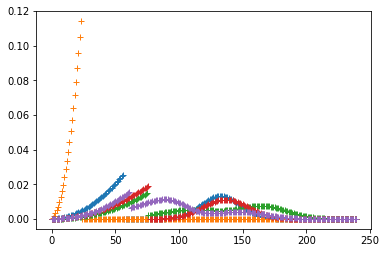

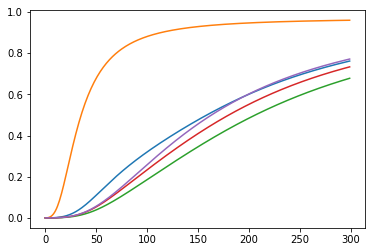

In [156]:
# check the processed data
r = np.random.randint(0,p,5)
print r
for i in r:
    plt.figure(0)
    plt.plot(x_train[i],'+')
    plt.figure(1)
    plt.plot(y_train[i])

In [442]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.callbacks import EarlyStopping

model = Sequential()

model.add(MyLayer(n, 
                input_shape=(n,), 
                
                
                trainable = False))
model.add(Dense(m))
model.add(Dropout(0.5))
model.add(Dense(m))

model.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['mean_squared_error', rmse, r_square])

earlystopping = EarlyStopping(monitor='mean_squared_error', patience=10, verbose=1, mode='auto')

result = model.fit(x_train, y_train, batch_size=32, epochs=240, verbose=1, callbacks=[earlystopping], validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/240
48000/48000 [==============================] - 14s 287us/step - loss: 0.0041 - mean_squared_error: 0.0041 - rmse: 0.0424 - r_square: 0.9515 - val_loss: 9.9839e-05 - val_mean_squared_error: 9.9839e-05 - val_rmse: 0.0080 - val_r_square: 0.9988
Epoch 2/240
48000/48000 [==============================] - 12s 242us/step - loss: 8.5743e-04 - mean_squared_error: 8.5743e-04 - rmse: 0.0237 - r_square: 0.9899 - val_loss: 1.3529e-04 - val_mean_squared_error: 1.3529e-04 - val_rmse: 0.0104 - val_r_square: 0.9984
Epoch 3/240
48000/48000 [==============================] - 13s 263us/step - loss: 3.7010e-04 - mean_squared_error: 3.7010e-04 - rmse: 0.0145 - r_square: 0.9957 - val_loss: 3.6332e-05 - val_mean_squared_error: 3.6332e-05 - val_rmse: 0.0043 - val_r_square: 0.9996
Epoch 4/240
48000/48000 [==============================] - 13s 280us/step - loss: 2.1654e-04 - mean_squared_error: 2.1654e-04 - rmse: 0.0111 - r_square: 0.9975 - val_loss: 

48000/48000 [==============================] - 12s 249us/step - loss: 1.9669e-04 - mean_squared_error: 1.9669e-04 - rmse: 0.0110 - r_square: 0.9977 - val_loss: 1.6153e-05 - val_mean_squared_error: 1.6153e-05 - val_rmse: 0.0031 - val_r_square: 0.9998
Epoch 33/240
48000/48000 [==============================] - 12s 254us/step - loss: 1.9512e-04 - mean_squared_error: 1.9512e-04 - rmse: 0.0110 - r_square: 0.9977 - val_loss: 3.3197e-05 - val_mean_squared_error: 3.3197e-05 - val_rmse: 0.0048 - val_r_square: 0.9996
Epoch 34/240
48000/48000 [==============================] - 13s 262us/step - loss: 1.9032e-04 - mean_squared_error: 1.9032e-04 - rmse: 0.0109 - r_square: 0.9978 - val_loss: 8.2920e-05 - val_mean_squared_error: 8.2920e-05 - val_rmse: 0.0089 - val_r_square: 0.9990
Epoch 35/240
48000/48000 [==============================] - 14s 282us/step - loss: 1.9562e-04 - mean_squared_error: 1.9562e-04 - rmse: 0.0110 - r_square: 0.9977 - val_loss: 1.9791e-05 - val_mean_squared_error: 1.9791e-05 - v

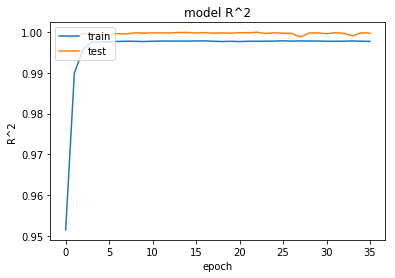

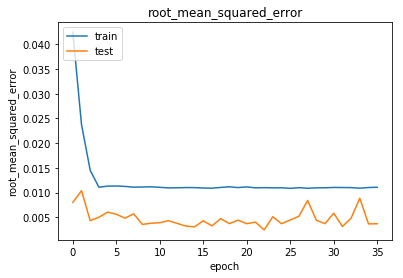



Mean absolute error (MAE):      0.003417
Mean squared error (MSE):       0.000029
Root mean squared error (RMSE): 0.005370
R square (sklearn) (R^2):       0.855669
R square (R^2):                 0.999664


In [443]:
# get predictions
y_pred = model.predict(x_test)

# plot training curve for R^2 (beware of scale, starts very low negative)
plt.plot(result.history['r_square'])
plt.plot(result.history['val_r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
           
# plot training curve for rmse
plt.plot(result.history['rmse'])
plt.plot(result.history['val_rmse'])
plt.title('root_mean_squared_error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

import sklearn.metrics, math
print("\n")
print("Mean absolute error (MAE):      %f" % sklearn.metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error (MSE):       %f" % sklearn.metrics.mean_squared_error(y_test,y_pred))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_test,y_pred)))
print("R square (sklearn) (R^2):       %f" % sklearn.metrics.r2_score(y_test,y_pred))
print("R square (R^2):                 %f" % backend.eval(r_square(backend.variable(y_test),backend.variable(y_pred))))



1380


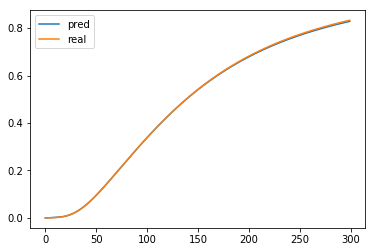

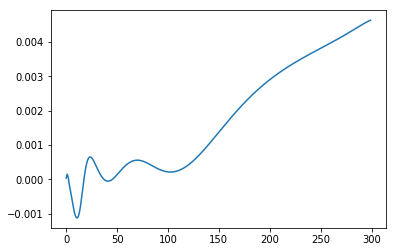

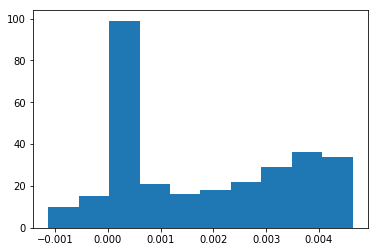

In [445]:
i = np.random.randint(0,q)
print i

plt.plot(y_pred[i])
plt.plot(y_test[i])

plt.legend(['pred', 'real'], loc='upper left')
plt.show()

plt.plot((y_test[i]-y_pred[i]))
plt.show()

plt.hist((y_test[i]-y_pred[i]))
plt.show()

In [446]:
from keras.utils import plot_model
plot_model(model, to_file='model-test-7.png')

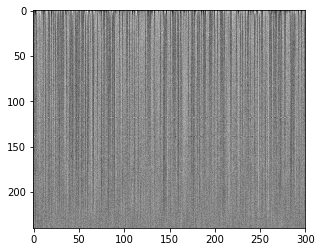

In [448]:
w = model.get_weights()
plt.imshow(w[1],cmap='gray')

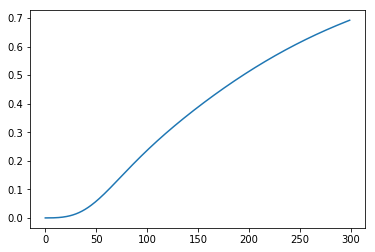

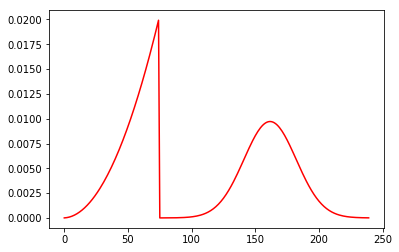

In [449]:
plt.plot(y_test[0])
plt.show()
plt.plot(x_test[0],'r')
plt.show()

(1, 240)
(1, 300)


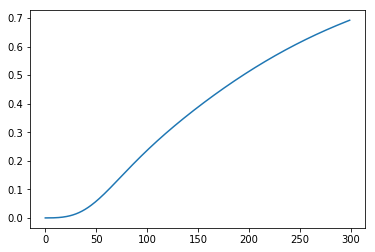

In [457]:
x_fit = np.random.uniform(0,0.01,size=(1, x_train[0].shape[0]))
print x_fit.shape
y_fit = np.reshape(y_test[0],(1, y_test[0].shape[0]))
print y_fit.shape

plt.plot(y_fit[0])

In [474]:
# now try the inverse

invmodel = Sequential()

invmodel.add(MyLayer(n, 
                input_shape=(n,), 
                ))
invmodel.add(Dense(m, trainable = False))
invmodel.add(Dense(m, trainable = False))

invmodel.set_weights(w)

invmodel.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['mean_squared_error', rmse, r_square])

earlystopping = EarlyStopping(monitor='mean_squared_error', patience=10, verbose=1, mode='auto')

invresult = invmodel.fit(x_fit, y_fit, batch_size=1, epochs=20, verbose=1, callbacks=[earlystopping])

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.0015 - mean_squared_error: 0.0015 - rmse: 0.0382 - r_square: 0.9719
Epoch 2/20
1/1 [==============================] - 0s 3ms/step - loss: 0.0264 - mean_squared_error: 0.0264 - rmse: 0.1624 - r_square: 0.4932
Epoch 3/20
1/1 [==============================] - 0s 3ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - rmse: 0.0328 - r_square: 0.9793
Epoch 4/20
1/1 [==============================] - 0s 3ms/step - loss: 5.4788e-04 - mean_squared_error: 5.4788e-04 - rmse: 0.0234 - r_square: 0.9895
Epoch 5/20
1/1 [==============================] - 0s 3ms/step - loss: 4.8420e-04 - mean_squared_error: 4.8420e-04 - rmse: 0.0220 - r_square: 0.9907
Epoch 6/20
1/1 [==============================] - 0s 4ms/step - loss: 3.9483e-04 - mean_squared_error: 3.9483e-04 - rmse: 0.0199 - r_square: 0.9924
Epoch 7/20
1/1 [==============================] - 0s 3ms/step - loss: 3.3335e-04 - mean_squared_error: 3.3335e-04 - rmse: 0.0183 - r_squa

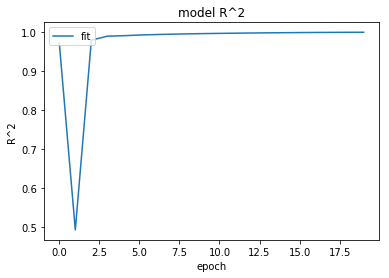

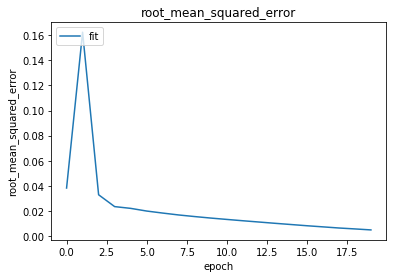

In [475]:
# plot training curve for R^2 (beware of scale, starts very low negative)
plt.plot(invresult.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['fit'], loc='upper left')
plt.show()
           
# plot training curve for rmse
plt.plot(invresult.history['rmse'])
plt.title('root_mean_squared_error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['fit'], loc='upper left')
plt.show()

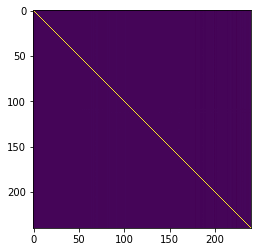

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

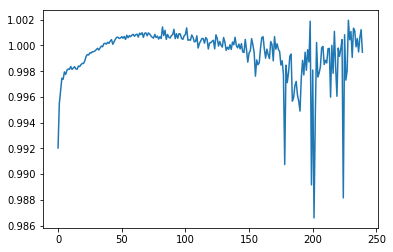

In [476]:
invweights = invmodel.get_weights()
plt.imshow(invweights[0])
plt.show()
plt.plot(np.diagonal(invweights[0]))
invweights[1]==w[1]

In [420]:
np.random.uniform(size=(240,240)).shape
w[0].shape

(240, 240)

In [478]:
x_train[0].shape

(240,)